## Import Library

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from IPython.display import Markdown, display

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

# I. Data Mining part

## 1. Exploring 

In [9]:
df = pd.read_csv("Invistico_Airline.csv")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [11]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


We can see this Data Set has customer's properties (Age, Gender,...), flight information (Class, Inflight wifi service, ...), user rating (Seat comfort, Food and drink, ...). 

- Customer's properties: Object 
- Flight information: Interger and Object 
- User raring: Interger (1->5) 
-> Final evaluate: Binary (0, 1) 

In [12]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Distribution of dataset's values

In [13]:
df.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

##### Let's see dataset quickly

In [14]:
def list_values_column(df,num_value):
    display(Markdown('**RESULT:'))
    for col in df.columns:
        if df[col].nunique() <= num_value:
            print('Column{} has :'.format(col)+ str(df[col].unique().tolist()),)
    

In [15]:
[[j, df[j].unique()] for j in [i for i in df.columns] if df[j].nunique() <= 5]

[['satisfaction', array(['satisfied', 'dissatisfied'], dtype=object)],
 ['Gender', array(['Female', 'Male'], dtype=object)],
 ['Customer Type',
  array(['Loyal Customer', 'disloyal Customer'], dtype=object)],
 ['Type of Travel',
  array(['Personal Travel', 'Business travel'], dtype=object)],
 ['Class', array(['Eco', 'Business', 'Eco Plus'], dtype=object)],
 ['Baggage handling', array([3, 4, 1, 2, 5], dtype=int64)]]

In [16]:
list_values_column(df,5)

**RESULT:

Columnsatisfaction has :['satisfied', 'dissatisfied']
ColumnGender has :['Female', 'Male']
ColumnCustomer Type has :['Loyal Customer', 'disloyal Customer']
ColumnType of Travel has :['Personal Travel', 'Business travel']
ColumnClass has :['Eco', 'Business', 'Eco Plus']
ColumnBaggage handling has :[3, 4, 1, 2, 5]


In [17]:
def values_count_column(df,num_value):
    display(Markdown('**RESULT:'))
    for col in df.columns:
        if df[col].nunique() <= num_value:
            print( 'Column ',col,':')
            print(df[col].value_counts()/len(df))

In [18]:
values_count_column(df,3)

**RESULT:

Column  satisfaction :
satisfied       0.547328
dissatisfied    0.452672
Name: satisfaction, dtype: float64
Column  Gender :
Female    0.507384
Male      0.492616
Name: Gender, dtype: float64
Column  Customer Type :
Loyal Customer       0.816908
disloyal Customer    0.183092
Name: Customer Type, dtype: float64
Column  Type of Travel :
Business travel    0.690584
Personal Travel    0.309416
Name: Type of Travel, dtype: float64
Column  Class :
Business    0.478596
Eco         0.448945
Eco Plus    0.072459
Name: Class, dtype: float64


In [19]:
[df[j].value_counts()/len(df[j]) for j in [i for i in df.columns] if df[j].nunique() <= 5]

[satisfied       0.547328
 dissatisfied    0.452672
 Name: satisfaction, dtype: float64,
 Female    0.507384
 Male      0.492616
 Name: Gender, dtype: float64,
 Loyal Customer       0.816908
 disloyal Customer    0.183092
 Name: Customer Type, dtype: float64,
 Business travel    0.690584
 Personal Travel    0.309416
 Name: Type of Travel, dtype: float64,
 Business    0.478596
 Eco         0.448945
 Eco Plus    0.072459
 Name: Class, dtype: float64,
 4    0.371420
 5    0.275239
 3    0.188520
 2    0.103419
 1    0.061403
 Name: Baggage handling, dtype: float64]

### Data Prepare

##### Rename columns

In [20]:
def rename_column(df,from_c,to_c = '_'):
    display(Markdown('**RESULT:**'))
    print('Columns changed from {} to _'.format(from_c))
    print(df.columns[df.columns.str.contains(from_c)])
    df.columns = [label.replace(from_c, to_c ) for label in df.columns]

In [21]:
rename_column(df,' ')
rename_column(df,'-')
#

**RESULT:**

Columns changed from   to _
Index(['Customer Type', 'Type of Travel', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')


**RESULT:**

Columns changed from - to _
Index(['On-board_service'], dtype='object')


##### Convert object to string

In [22]:
def column_cat(df):
    cols = df.select_dtypes(include=['object']).columns
    return cols

In [23]:
def object_to_string(df):
    cols = column_cat(df)
    i = 0
    for col in cols:
        i+=1
        df[col] = df[col].astype(str)
        if  i > 0:
            print(col + 'is converted')
        else:
            print('columns are not changed.')
    return df

In [24]:
object_to_string(df)

satisfactionis converted
Genderis converted
Customer_Typeis converted
Type_of_Travelis converted
Classis converted


,satisfaction,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Seat_comfort,Departure/Arrival_time_convenient,Food_and_drink,...,Online_support,Ease_of_Online_booking,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


<AxesSubplot:>

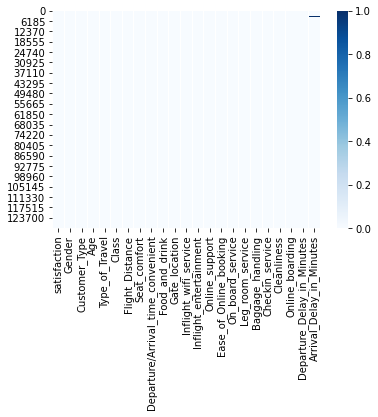

In [25]:

sns.heatmap(df.isna(),cmap="Blues")

In [26]:
total = df.isna().sum()
total

satisfaction                           0
Gender                                 0
Customer_Type                          0
Age                                    0
Type_of_Travel                         0
Class                                  0
Flight_Distance                        0
Seat_comfort                           0
Departure/Arrival_time_convenient      0
Food_and_drink                         0
Gate_location                          0
Inflight_wifi_service                  0
Inflight_entertainment                 0
Online_support                         0
Ease_of_Online_booking                 0
On_board_service                       0
Leg_room_service                       0
Baggage_handling                       0
Checkin_service                        0
Cleanliness                            0
Online_boarding                        0
Departure_Delay_in_Minutes             0
Arrival_Delay_in_Minutes             393
dtype: int64

##### Arrival Delay in Minutes has 393 missing values

In [27]:
def Missing_table(df):    
    sum_na = df.isna().sum()
    miss_percent = sum_na/len(df)
    Na_table = pd.concat([sum_na,miss_percent],axis = 1)
    Na_table = Na_table.rename(columns = {0:'Sum_of_na',1:'Percent_na'})
    Na_table = Na_table[Na_table.iloc[:,1]!=0]
    Na_table
    return Na_table

In [28]:
Missing_table(df)

,Sum_of_na,Percent_na
Arrival_Delay_in_Minutes,393,0.003026


In [29]:
en = LabelEncoder()
df['satisfaction'] = en.fit_transform(df['satisfaction'])

In [30]:
df

,satisfaction,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Seat_comfort,Departure/Arrival_time_convenient,Food_and_drink,...,Online_support,Ease_of_Online_booking,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,1,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,1,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,1,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,1,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,0,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,0,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,0,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


## 2. Visualizing

### Customer's properties

- Select customer's properties columns

In [31]:
df["Age"] = pd.cut(df["Age"], bins= [0, 27, 57, 77, np.inf]
        , labels= ["7-27", "27-57", "57-77", "77-85"])

In [32]:
bin_user_prop = [i for i in df.loc[:,"satisfaction":"Class"].columns]

In [33]:
df[bin_user_prop]

,satisfaction,Gender,Customer_Type,Age,Type_of_Travel,Class
0,1,Female,Loyal Customer,57-77,Personal Travel,Eco
1,1,Male,Loyal Customer,27-57,Personal Travel,Business
2,1,Female,Loyal Customer,7-27,Personal Travel,Eco
3,1,Female,Loyal Customer,57-77,Personal Travel,Eco
4,1,Female,Loyal Customer,57-77,Personal Travel,Eco
...,...,...,...,...,...,...
129875,1,Female,disloyal Customer,27-57,Personal Travel,Eco
129876,0,Male,disloyal Customer,57-77,Personal Travel,Business
129877,0,Male,disloyal Customer,57-77,Personal Travel,Eco
129878,0,Male,disloyal Customer,57-77,Personal Travel,Eco


- Using countplot to visualize customer's properties along with satisfaction

In [ ]:
bin_user_prop

In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(12,8), dpi= 200)
for i in range(0,2):
    for j in range(0,2):
        sns.countplot(data= df[bin_user_prop], x= bin_user_prop[2*i + j + 1], hue= "satisfaction", ax= axes[i][j])
        axes[i][j].legend(loc= (1.01, 0.87))
        axes[i][j].set_xlabel("")
        axes[i][j].set_ylabel("")
        axes[i][j].set(title= bin_user_prop[2*i + j + 1])

plt.tight_layout()
plt.show()

- Separate customers into 4 groups according to Age  

In [ ]:
def plot_target_column (df, target):
    ax = sns.countplot(x=target, data=df)
    plt.title('Distribution of ' + target + ' column')
    plt.xlabel('Frequency')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
    total = len(df[target])
    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
            ax.text(p.get_x()+p.get_width()/2., p.get_height() + 0.2, p.get_height(),ha="center")
    plt.show()

In [ ]:
plt.figure(figsize= (8,5))
plot_target_column(df, "satisfaction")


### Flight information

In [ ]:
df

In [ ]:
flyi_cols = df[['Flight_Distance', 'Class', 'Departure/Arrival_time_convenient']].columns

In [ ]:
flyi_cols

In [ ]:
df[flyi_cols]

In [ ]:
df['satisfaction']

In [ ]:
pd.concat([df[flyi_cols], df['satisfaction']], axis= 1)

In [ ]:
plt.figure(figsize= (12, 5), dpi= 200)
sns.countplot(data= df, x= "Class", hue= "satisfaction");
## Flight Distance	Seat comfort	Departure/Arrival time convenient
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(12,8), dpi= 200)
for i in range(0,3):
    sns.countplot(data= pd.concat([df[flyi_cols], df['satisfaction']], axis= 1), x= flyi_cols[i], hue= "satisfaction", ax= axes[i])
    axes[i].legend(loc= (1.01, 0.87))
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].set(title= flyi_cols[i])

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize= (12, 5), dpi= 200)
sns.catplot(data= df, x= 'Flight_Distance', y= 'Type_of_Travel', hue= 'satisfaction', col= 'Class', kind= 'bar')
plt.show();

### Find Correlation

In [ ]:
cols_num = df.columns[df.dtypes!= object]

In [ ]:
cols_ob = df.columns[df.dtypes == object]

In [ ]:
df[cols_ob]

In [ ]:
change = LabelEncoder()

In [ ]:
pd.Series(change.fit_transform(df[['Class']]))

In [ ]:
df[cols_ob]

In [ ]:
np.info

In [ ]:
lb = OneHotEncoder()

In [ ]:
a = lb.fit(df[['Class']])

In [ ]:
lb.categories_

In [ ]:
lb.get_feature_names(["Class"])

In [ ]:
##

In [ ]:
corr = (dcorr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(1000, 200, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .10})


Seat_comfort is highly correlated with Food_and_drink.

Online_support is highly correlated with Online_boarding,Ease_of_Online_booking.

Inflight_wifi_service is highly correlated with Online_support,Ease_of_Online_booking.

Departure_Delay_in_Minutes is highly correlated with Arrival_Delay_in_Minutes
###### Conclusion: Don't remove any column

### Preprocessing


#### Split train set & test set 

#### Build function

#### Using sklearn 


In [ ]:
df

In [36]:
# stratified sampling by Age_cat
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["Age"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]


In [37]:
strat_train_set

,satisfaction,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Seat_comfort,Departure/Arrival_time_convenient,Food_and_drink,...,Online_support,Ease_of_Online_booking,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
71110,1,Male,Loyal Customer,27-57,Business travel,Business,2507,3,3,3,...,2,2,3,3,5,4,4,2,0,0.0
96342,1,Male,Loyal Customer,27-57,Business travel,Business,2692,3,3,3,...,4,4,4,4,4,4,4,4,0,0.0
58454,1,Male,disloyal Customer,27-57,Business travel,Business,1002,4,4,4,...,5,3,4,3,5,5,4,3,0,0.0
71478,0,Female,Loyal Customer,7-27,Business travel,Business,4705,2,1,1,...,2,2,2,4,2,2,2,2,0,0.0
112976,1,Female,Loyal Customer,7-27,Business travel,Business,1477,2,2,2,...,4,4,4,2,5,4,4,4,10,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25270,0,Male,Loyal Customer,7-27,Personal Travel,Eco Plus,1628,3,4,3,...,4,4,5,2,5,3,5,4,0,1.0
312,1,Male,Loyal Customer,7-27,Personal Travel,Eco,3001,0,4,0,...,3,4,3,2,4,5,5,4,0,0.0
45015,0,Female,disloyal Customer,7-27,Business travel,Business,1241,2,0,2,...,1,1,4,2,4,4,5,1,0,0.0
63308,1,Female,disloyal Customer,27-57,Business travel,Eco,2545,5,5,5,...,5,5,1,2,2,2,1,5,16,3.0


##### Split label

In [38]:
data_label = strat_train_set['satisfaction']
data_train = strat_train_set.drop("satisfaction",axis =1 )

In [82]:
data_label

71110     1
96342     1
58454     1
71478     0
112976    1
         ..
25270     0
312       1
45015     0
63308     1
90110     1
Name: satisfaction, Length: 103904, dtype: int32

In [39]:
data_train

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Seat_comfort,Departure/Arrival_time_convenient,Food_and_drink,Gate_location,...,Online_support,Ease_of_Online_booking,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
71110,Male,Loyal Customer,27-57,Business travel,Business,2507,3,3,3,3,...,2,2,3,3,5,4,4,2,0,0.0
96342,Male,Loyal Customer,27-57,Business travel,Business,2692,3,3,3,3,...,4,4,4,4,4,4,4,4,0,0.0
58454,Male,disloyal Customer,27-57,Business travel,Business,1002,4,4,4,1,...,5,3,4,3,5,5,4,3,0,0.0
71478,Female,Loyal Customer,7-27,Business travel,Business,4705,2,1,1,1,...,2,2,2,4,2,2,2,2,0,0.0
112976,Female,Loyal Customer,7-27,Business travel,Business,1477,2,2,2,2,...,4,4,4,2,5,4,4,4,10,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25270,Male,Loyal Customer,7-27,Personal Travel,Eco Plus,1628,3,4,3,2,...,4,4,5,2,5,3,5,4,0,1.0
312,Male,Loyal Customer,7-27,Personal Travel,Eco,3001,0,4,0,2,...,3,4,3,2,4,5,5,4,0,0.0
45015,Female,disloyal Customer,7-27,Business travel,Business,1241,2,0,2,4,...,1,1,4,2,4,4,5,1,0,0.0
63308,Female,disloyal Customer,27-57,Business travel,Eco,2545,5,5,5,4,...,5,5,1,2,2,2,1,5,16,3.0


##### Build Pipeline to Preprocessing

In [40]:
df['Age'] = df['Age'].astype('object')

In [41]:
#split numberic columns and categorical columns to preprocessing 
col_cat = data_train.columns[data_train.dtypes==object]
data_train_cat = data_train[col_cat]
data_train_num = data_train.columns[data_train.dtypes!=object]

In [42]:
data_train_cat

,Gender,Customer_Type,Age,Type_of_Travel,Class
71110,Male,Loyal Customer,27-57,Business travel,Business
96342,Male,Loyal Customer,27-57,Business travel,Business
58454,Male,disloyal Customer,27-57,Business travel,Business
71478,Female,Loyal Customer,7-27,Business travel,Business
112976,Female,Loyal Customer,7-27,Business travel,Business
...,...,...,...,...,...
25270,Male,Loyal Customer,7-27,Personal Travel,Eco Plus
312,Male,Loyal Customer,7-27,Personal Travel,Eco
45015,Female,disloyal Customer,7-27,Business travel,Business
63308,Female,disloyal Customer,27-57,Business travel,Eco


##### detect and remove ouliers

In [43]:
Q1 = strat_train_set.quantile(0.25)
Q3 = strat_train_set.quantile(0.75)
IQR = Q3-Q1
IQR

satisfaction                            1.0
Flight_Distance                      1186.0
Seat_comfort                            2.0
Departure/Arrival_time_convenient       2.0
Food_and_drink                          2.0
Gate_location                           2.0
Inflight_wifi_service                   2.0
Inflight_entertainment                  2.0
Online_support                          2.0
Ease_of_Online_booking                  3.0
On_board_service                        1.0
Leg_room_service                        3.0
Baggage_handling                        2.0
Checkin_service                         1.0
Cleanliness                             2.0
Online_boarding                         2.0
Departure_Delay_in_Minutes             12.0
Arrival_Delay_in_Minutes               13.0
dtype: float64

In [ ]:
#strat_train_set = strat_train_set[~((data_train_num < Q1-1.5*IQR)|(data_train_num > Q3+1.5*IQR)).any(axis = 1)]

In [ ]:
data_train_num

#####  Pipeline handle numeric

In [44]:
#pipeline handle missing values and scaling feature
num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="mean")),
 ('std_scaler', MinMaxScaler()),
 ])
 

##### Pipeline handle Numeric & categorical

In [76]:
# full pipeline handle categorical columns and numberic columns
num_attribs = list(data_train_num)
cat_attribs = list(col_cat)
full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs),
 ("cat",OrdinalEncoder(), cat_attribs),
 ])

In [77]:
data_train_prepare = full_pipeline.fit_transform(data_train)

In [78]:
data_train_prepare

array([[0.35608696, 0.6       , 0.6       , ..., 0.        , 0.        ,
        0.        ],
       [0.38289855, 0.6       , 0.6       , ..., 0.        , 0.        ,
        0.        ],
       [0.13797101, 0.8       , 0.8       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.1726087 , 0.4       , 0.        , ..., 2.        , 0.        ,
        0.        ],
       [0.3615942 , 1.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.55173913, 0.4       , 0.4       , ..., 0.        , 0.        ,
        0.        ]])

In [81]:
full_col_name = num_attribs + cat_attribs
data_train_prepare =pd.DataFrame(data_train_prepare,columns=full_col_name)
data_train_prepare

,Flight_Distance,Seat_comfort,Departure/Arrival_time_convenient,Food_and_drink,Gate_location,Inflight_wifi_service,Inflight_entertainment,Online_support,Ease_of_Online_booking,On_board_service,...,Checkin_service,Cleanliness,Online_boarding,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Gender,Customer_Type,Age,Type_of_Travel,Class
0,0.356087,0.6,0.6,0.6,0.6,0.4,0.4,0.4,0.4,0.6,...,0.8,0.8,0.4,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0
1,0.382899,0.6,0.6,0.6,0.6,0.6,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0
2,0.137971,0.8,0.8,0.8,0.2,0.6,0.8,1.0,0.6,0.8,...,1.0,0.8,0.6,0.000000,0.000000,1.0,1.0,0.0,0.0,0.0
3,0.674638,0.4,0.2,0.2,0.2,0.4,0.4,0.4,0.4,0.4,...,0.4,0.4,0.4,0.000000,0.000000,0.0,0.0,2.0,0.0,0.0
4,0.206812,0.4,0.4,0.4,0.4,0.8,1.0,0.8,0.8,0.8,...,0.8,0.8,0.8,0.006281,0.005682,0.0,0.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0.228696,0.6,0.8,0.6,0.4,0.8,0.6,0.8,0.8,1.0,...,0.6,1.0,0.8,0.000000,0.000631,1.0,0.0,2.0,1.0,2.0
103900,0.427681,0.0,0.8,0.0,0.4,0.8,0.0,0.6,0.8,0.6,...,1.0,1.0,0.8,0.000000,0.000000,1.0,0.0,2.0,1.0,1.0
103901,0.172609,0.4,0.0,0.4,0.8,0.2,0.4,0.2,0.2,0.8,...,0.8,1.0,0.2,0.000000,0.000000,0.0,1.0,2.0,0.0,0.0
103902,0.361594,1.0,1.0,1.0,0.8,1.0,1.0,1.0,1.0,0.2,...,0.4,0.2,1.0,0.010050,0.001894,0.0,1.0,0.0,0.0,1.0


##### Label encoder with label variable